<a href="https://colab.research.google.com/github/aidonou/Gu-a-de-Programaci-n-1/blob/main/HistorialNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from google.colab import files
from datetime import datetime

In [ ]:
file_ = files.upload()

MessageError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hist = pd.read_csv("NetflixHistory.csv")

In [ ]:
def filtro_dev (dispositivos):
  return dispositivos not in ["Sony PS4", "Chrome PC (Cadmium)", "Apple iPhone 7 Plus (CDMA)", "Apple iPhone 6s", "Netflix Windows App - Cadmium Windows Mobile", "Samsung 2015 NT14M DTV Smart TV", "iPhone 5S GSM", "Google Chromecast V3 Streaming Stick"]

In [ ]:
df = hist[hist["Device Type"].apply(filtro_dev)]

In [ ]:
def TextoASeg(string):
  if not isinstance(string, str):
    return string
  hours, minutes, seconds = string.split(":")
  return int(seconds) + (int(minutes) + int(hours) * 60) * 60

df['Duration'] = df['Duration'].apply(TextoASeg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df = df[pd.isna(df["Supplemental Video Type"])]

# En el df filtrado solo por dispositivos quedaban objetos que no eran ni series ni películas, y estaban diferenciados por un valor nulo o no en la serie "Supplemental Video Type"
# La función "pd.isna" refiere a los valores nulos y le pasé como parámetro la serie "Supplemental Video Type", para que se fije q valores nulos hay y solo guarde esos en el mismo df
# Esto no lo sabía, pero necesitaba dejar afuera los trailers, los hooks y diferentes items que no eran ni series ni películas y no tenía idea como hasta que me ayudó Matias Blanco

In [ ]:
peliculas = df[df["Title"].str.split(":").apply(len) < 3]
series = df[df['Title'].str.split(":").apply(len) > 2]

Esto lo que hace es devolver un dataframe en el que solo hay películas (o debería) porque divide los strings de la serie "Title" cada vez que hay un ":", y si la funcion "len" me devuelve que hay menos de 3 strings, guarda el registro en el dataframe llamado "peliculas"

In [ ]:
def StrToSecs (String):
  if isinstance(String, int):
    return String
  horas, minutos, segundos = String.split(":")
  return int(segundos) + (int(minutos) + (int (horas) * 60)) * 60

df["Duration"] = df["Duration"].apply(StrToSecs)

Ej 1: Contabilizar el dispositivo con el que más títulos se reprodujeron

value_counts lo que hace es contar la cantidad de veces que aparecen valores únicos en la columna especificada del dataframe que tiene guardado el historial filtrado, y si uso esta función con la de idxmax, me devuelve el valor único que más se repitió a lo largo de toda la columna del dataframe

In [ ]:
df["Device Type"].value_counts().idxmax()

'Apple Apple TV 4 Apple TV'

Ej 2 A: Encontrar la película con más ocurrencias y la película con mayor duración total

Con respecto a la consigna de obtener la películka con mayor ocurrencias, usé las mismas funciónes de value_counts().idxmax() para contar cuál fue la que más veces se reprodujo en distintos momentos

In [ ]:
peliculas["Title"].value_counts().idxmax()

'Star Wars: El Imperio contraataca'

Ej 2 B: 

In [ ]:
TitulosPelis = peliculas["Title"].value_counts().to_dict()

for e in TitulosPelis.keys():
  TitulosPelis[e] = sum(peliculas[peliculas["Title"] == e]["Duration"])

dict(sorted(TitulosPelis.items(), key=lambda item: item[1], reverse=True)[:1])

{'Star Wars: El Imperio contraataca': 29433}

Ej 3 Generar un TOP “N” de series vistas y graficar.

In [ ]:
# series['Title'].value_counts().to_dict() devuelve un valor contando la cantidad de ocurrencias
titulosParaSeriesporTiempoVisto = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()
titulosParaSeriesporOcurrencias = series['Title'].apply(lambda x: x.split(":")[0]).value_counts().to_dict()


In [ ]:
#Variable para modificar el top
topN = 5

A- Por tiempo visto


In [ ]:
# Cada título diferente encontrado se le suma a la duracion de las ocurrencias
for titulo in titulosParaSeriesporTiempoVisto.keys():
  titulosParaSeriesporTiempoVisto[titulo] = sum(series[series['Title'].str.contains(titulo)]['Duration'])

# La funcion sorted es parecida que en el ejercicio A. La diferencia es que convertimos a diccionario los primeros items
datos1 = dict(sorted(titulosParaSeriesporTiempoVisto.items(), key=lambda item: item[1], reverse=True)[:topN])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


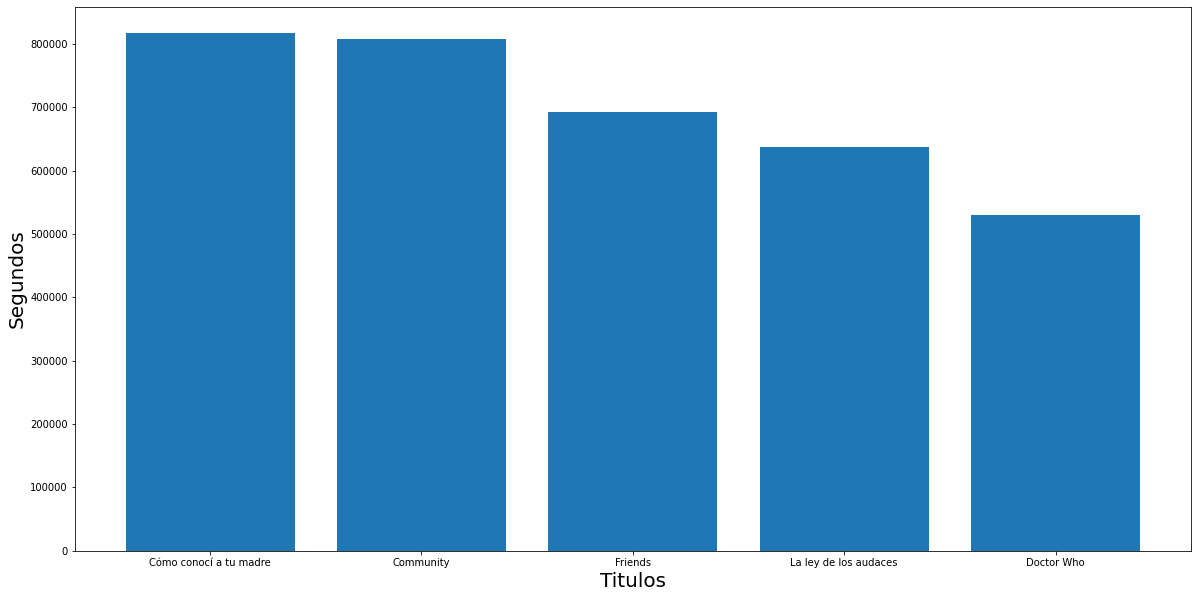

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(datos1.keys(), datos1.values())
plt.xlabel("Titulos", fontsize=20)
plt.ylabel("Segundos", fontsize=20)
plt.show()

B- Por ocurrencias

In [ ]:
datos2 = dict(sorted(titulosParaSeriesporOcurrencias.items(), key=lambda item: item[1], reverse=True)[:topN])

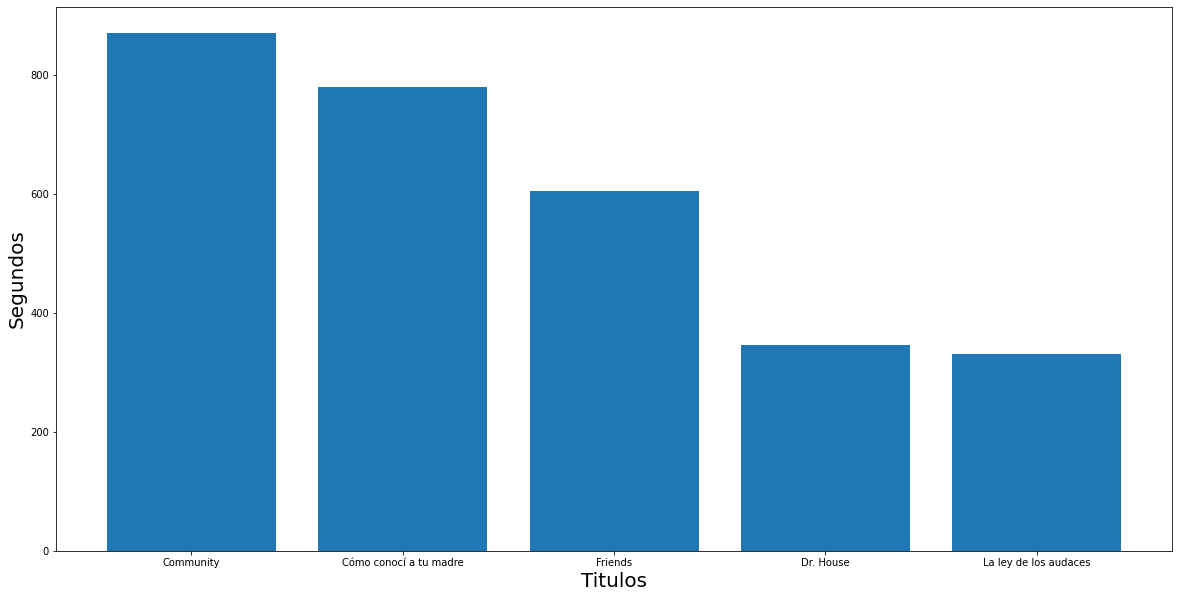

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(datos2.keys(), datos2.values())
plt.xlabel("Titulos", fontsize=20)
plt.ylabel("Segundos", fontsize=20)
plt.show()

Ej 4:

In [ ]:
conFecha = hist[hist["Device Type"].apply(filtro_dev)]

In [ ]:
dt = datetime.now()

In [ ]:
conFecha["Start Time"] = pd.to_datetime(conFecha["Start Time"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:


titulosXdiaYhora = [[y for y in range(24)] for x in range(7)]
for dia in range(7):
  for hora in range(24):
    titulosXdiaYhora[dia][hora] = sum(conFecha[(conFecha['Start Time'].dt.dayofweek == dia) & (conFecha['Start Time'].dt.hour == hora)]['Title'].value_counts().to_list())

Text(249.0, 0.5, 'Dias')

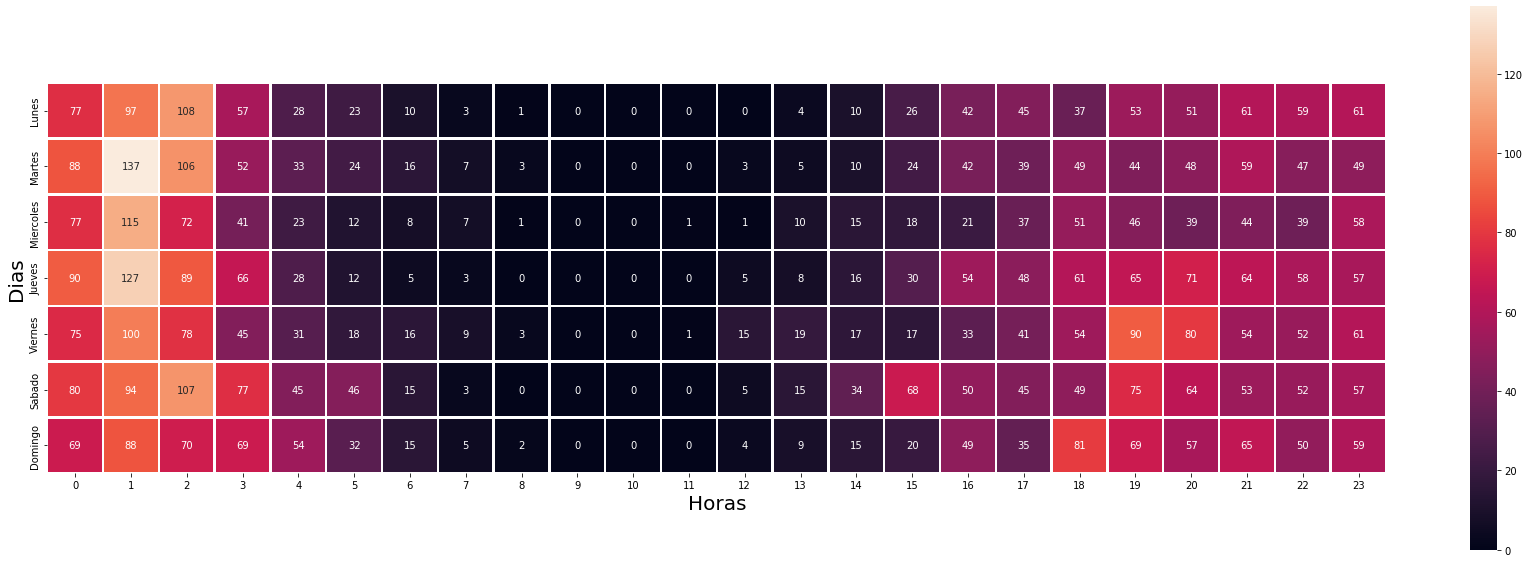

In [ ]:
Semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

plt.figure(figsize =(30,10))

seaborn.heatmap(titulosXdiaYhora, annot = True, fmt = 'd', square = True, linewidths = 1.5, cbar = True, yticklabels = Semana)
plt.xlabel("Horas", fontsize = 20)
plt.ylabel("Dias", fontsize = 20)

Ej 5:

<BarContainer object of 8 artists>

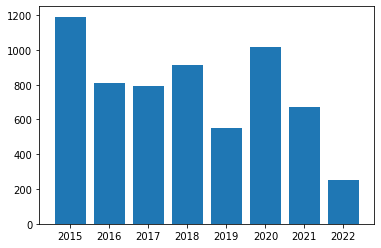

In [ ]:
dou = df['Start Time'].apply(pd.Timestamp).dt.year.value_counts().to_dict()
plt.bar(dou.keys(), dou.values())

Ej 6:

In [ ]:
nombrepelis = df['Title'].value_counts().to_dict()

totalsegundos = 0

for titulo in nombrepelis.keys():
  totalsegundos += sum(df[df['Title'] == titulo]['Duration'])

dias = totalsegundos/86400
horas = (dias - int(dias)) * 24
minutos = (horas - int(horas)) * 60
segundos = (minutos - int(minutos)) * 60

In [ ]:
print(str(int(dias)) + ":" + str(int(horas)) + ":" + str(int(minutos)) + ":" + str(int(segundos)))

99:18:11:41
